## 1. Load the dataset

In the first step, we load the dataset, as well as the libraries that might be useful.

In [47]:
# import the libaries
import pandas as pd
import numpy as np
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import the dataset
chocolate_df = pd.read_csv(r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating/Data/Orginal Data/flavors_of_cacao.csv',index_col = False)

In [48]:
path = r'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating'

## 2. Inspect the dataset

After the dataset is imported, we can inspect the dataset to get a primilinary impression of it, identify potential quality issues and fix them. 

This includes:

- Check the shape of the data frame
- Examine the column names
- Inspect the data type of each column
- Based on the data type, summarise the variables
- Check for missing values and decide how to deal with them

Shape of the data frame

In [49]:
chocolate_df.shape

(1795, 9)

This dataset contains 9 variables (columns) and 1795 observations (rows).

In [50]:
# show the first 10 observations
chocolate_df.head(10)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


Column names

In [51]:
# examine the column names to see if they are reasonable
chocolate_df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

As we can see, the column names of this dataset are a bit messy, because:

most of the column names contain the markdown script '\n', which stands for a new line, but doesn't work here and is also unnecessary;
according to the description on the dataset page, the second column is about the specific geo-region of origin for the bar, so we can modify the name as Bar Origin to make it shorter;
The column name REF itself is unclear, but can be interpreted with the help of the dataset page.
Based on these points, we can clean the column names to make them more readable and comprehensible.

In [52]:
# create a list to contain the new names
new_colnames = []

# go through all the column names and remove the '\n' string if exists
for col in chocolate_df.columns:
    if '\n' in col:
        new_name = col.replace('\n', ' ')
    else:
        new_name = col
    new_colnames.append(new_name)

new_colnames

['Company\xa0 (Maker-if known)',
 'Specific Bean Origin or Bar Name',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Company Location',
 'Rating',
 'Bean Type',
 'Broad Bean Origin']

In [53]:
# still some manuel modification needed here
new_colnames[0] = 'Company (if known)'
new_colnames[1] = 'Bar Origin'
# make the last column name shorter and consistent with the column name 'Bar Origin'
new_colnames[8] = 'Bean Origin'
new_colnames

['Company (if known)',
 'Bar Origin',
 'REF',
 'Review Date',
 'Cocoa Percent',
 'Company Location',
 'Rating',
 'Bean Type',
 'Bean Origin']

In [54]:
# replace the messy column names with the cleaned ones
chocolate_df.columns = new_colnames
chocolate_df.head(3)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo


Now the header is much easier to read!


## Data types
After dealing with the column names, we can check out the data type of each column, in order to determine what kind of operations can be performed later.
The three most common data types in python are float, integer and string.

In [55]:
# inspect the data type of each column
chocolate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company (if known)  1795 non-null   object 
 1   Bar Origin          1795 non-null   object 
 2   REF                 1795 non-null   int64  
 3   Review Date         1795 non-null   int64  
 4   Cocoa Percent       1795 non-null   object 
 5   Company Location    1795 non-null   object 
 6   Rating              1795 non-null   float64
 7   Bean Type           1794 non-null   object 
 8   Bean Origin         1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


This dataset contains three data types:
float (float64): a number that has a decimal place. In this dataset, column Rating has the float data type.
integer (int64): a number without a decimal point. In this dataset, columns REF, Review Date are of this data type.
string (object): a sequence of characters. In this dataset, columns Company (if known), Bar Origin, Cocoa Percent, Company Location, Bean Type and Bean Origin are of this data type.

We notice that it might be more reasonable to change the data type of Cocoa Percent from string to float for further analysis.

In [56]:
# turning Cocoa Percent from string to float data type
# first remove the '%' sign, then convert the remaining number into a float and devide it by 100 
chocolate_df['Cocoa Percent'] = chocolate_df['Cocoa Percent'].apply(lambda x: float(x.strip('%')) / 100.0)
chocolate_df.head(3)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo


Summarise the variables
After finding out the data types, we can start to produce some useful summaries of the variables to gain an idea of how the data is distributed. This step could be considered as a descriptive, univariate analysis, as we only investigate one variable of interest at a time.

For numeric varaibles, this includes the mean, minimum, maximum, median, lower and upper quartile (we can also add standard deviation to see how dispersed the variable is in relation to its mean). To visualise the data, swarm plot, histogramm, density plot, rug plot, box plot and violin plot would be good choices to fulfil the purpose.

For categorical variables, the summary should present the number of observations in each of the category given. As for the visualisation, bar plot and pie chart are good options for this type of data.

Let us start with the numerical variables: REF, Review Date, Cocoa Percent and Rating.

In [57]:
# create a new temporary data frame which only contains the numeric variables
df_numeric = chocolate_df[['REF', 'Review Date', 'Cocoa Percent', 'Rating']]

# get a summary tabel of the numeric variables
df_numeric.describe().round(2)

,REF,Review Date,Cocoa Percent,Rating
count,1795.00,1795.00,1795.00,1795.00
mean,1035.90,2012.33,0.72,3.19
std,552.89,2.93,0.06,0.48
min,5.00,2006.00,0.42,1.00
25%,576.00,2010.00,0.70,2.88
50%,1069.00,2013.00,0.70,3.25
75%,1502.00,2015.00,0.75,3.50
max,1952.00,2017.00,1.00,5.00


To better illustrate how the data points are distributed, we can plot the variables.

Text(0.5, 1.0, 'How are the REF values distributed?')

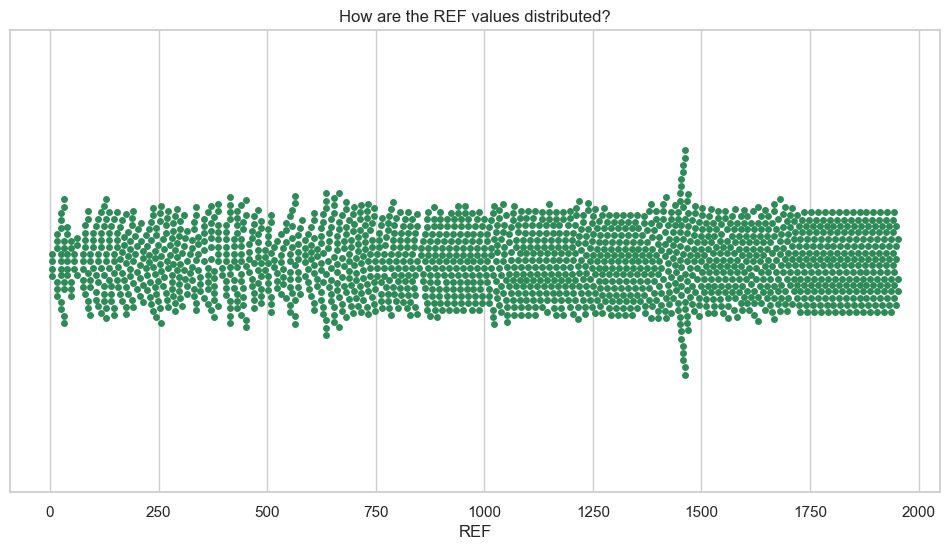

In [83]:
# REF
sns.set_style('whitegrid')
plt.figure(figsize = (12, 6))
g = sns.swarmplot(data = df_numeric, x = 'REF', color = 'seagreen')
plt.title('How are the REF values distributed?')

In [88]:
# Save figure
g.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Most_reveiew'))

<Figure size 640x480 with 0 Axes>

In [79]:
#current dir
cwd = os.getcwd()
cwd

'/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating/Script'

Text(0.5, 1.0, 'In which year did we give the most reviews?')

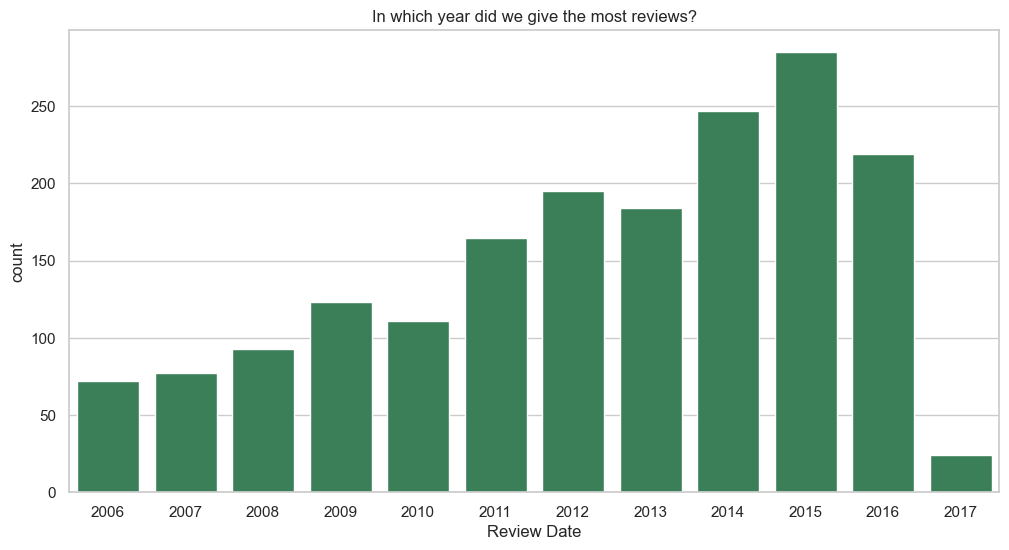

In [92]:
# Review Date
plt.figure(figsize = (12, 6))
y = sns.countplot(data = df_numeric, x = 'Review Date', color = 'seagreen' )
plt.title('In which year did we give the most reviews?')

In [93]:


y.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Most_reveiew_1'))

Text(0.5, 1.0, 'What is the most frequently seen cocoa percentage?')

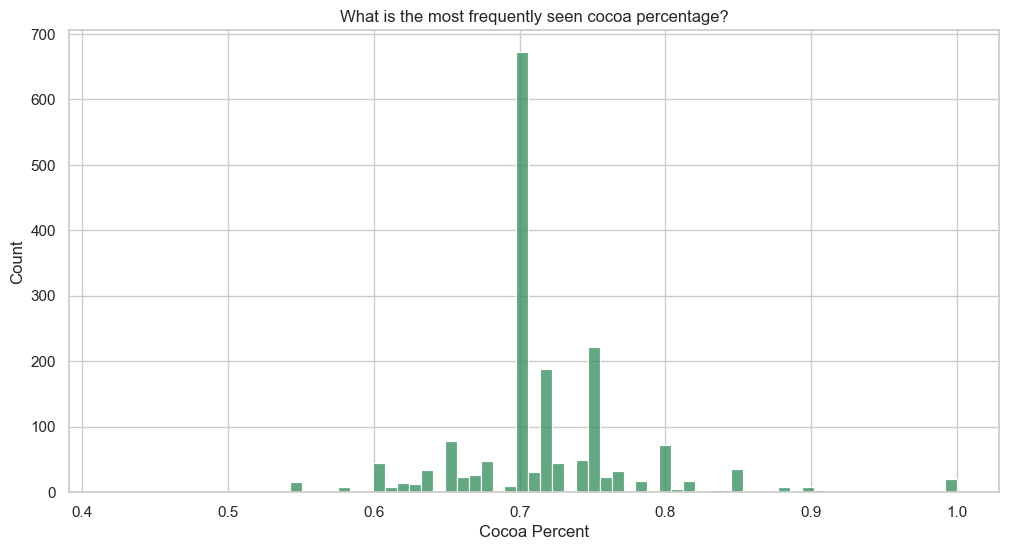

In [94]:
# Cocoa Percent
plt.figure(figsize = (12, 6))
z = sns.histplot(data = df_numeric, x = 'Cocoa Percent', color = 'seagreen')
plt.title('What is the most frequently seen cocoa percentage?')

In [95]:
# Save figure
z.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Cocoa_Percent'))

Text(0.5, 1.0, 'In which range are the ratings concentrated?')

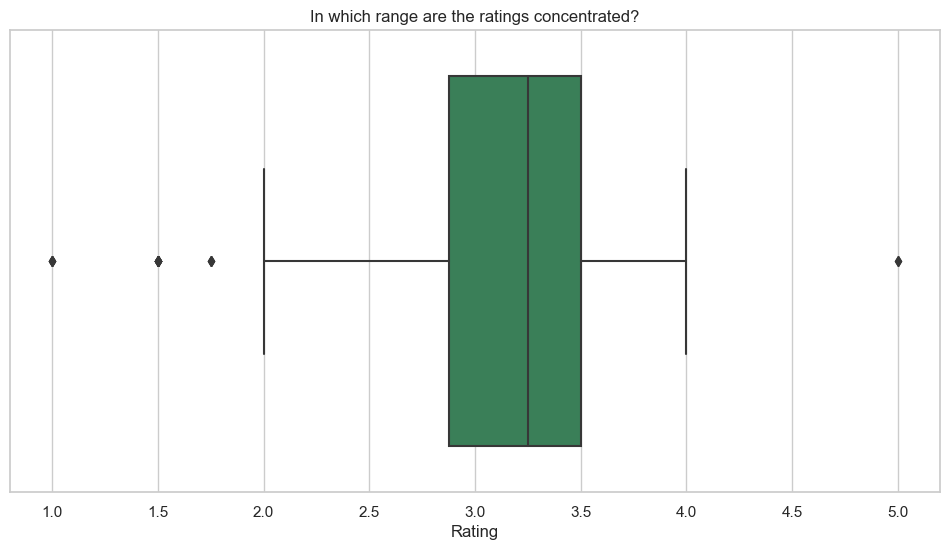

In [96]:
# Rating
plt.figure(figsize = (12, 6))
box = sns.boxplot(data = df_numeric, x = 'Rating', color = 'seagreen')
plt.title('In which range are the ratings concentrated?')

In [97]:
box.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Rating'))

As the analysis goes so far, we already gain a few insights about the numeric variables. For example, we could tell that:

- the ratings were made in a period from 2006 to 2017
- the majority of the chocolate reviewed contains 70% of cocoa and
- half of the ratings given lie between 2.88 and 3.50.
- For cocoa percentage, the average value is 0.72, with a maximum of 1 and a minimum of 0.42.
- For ratings, the average is 3.19, with a maximum of 5 and a minimum of 1.

Next, we will have a look of the categorical varaibles: Company, Bar Origin, Bean Origin, Company Location and Bean Type.

In [62]:
# same as processing numeric variables, let's create a temporary data frame only for categorical variables
df_categorical = chocolate_df[['Company (if known)', 'Company Location', 'Bar Origin', 'Bean Origin', 'Bean Type']]

# and you can get a summary table for them as well
df_categorical.describe()

,Company (if known),Company Location,Bar Origin,Bean Origin,Bean Type
count,1795,1795,1795,1794,1794
unique,416,60,1039,100,41
top,Soma,U.S.A.,Madagascar,Venezuela,
freq,47,764,57,214,887


It seems that the chocolate reviewed in this dataset has very diverse origins - the dataset contains chocolate from 416 companies, which are located in 60 different locations; the bars are produced in over 1000 specific locations; the beans are from 100 broad locations and are of 41 different types (NAs are not considered here yet). Technically speaking, the categorical variables have pretty high cardinality, means that there can be many possible values for a single attribute.

In terms of Bar Origin and Bean Type, there are only 1794 observations, one less than the 1795 observations of all the other variables. Also, if we look at the most frequent "Bean Type", the field is left empty. Maybe it means there is no record (missing values) of the bean type for a specific observation. We will deal with these data quality issues later.

For now, let's plot the categorical variables using bar plot.

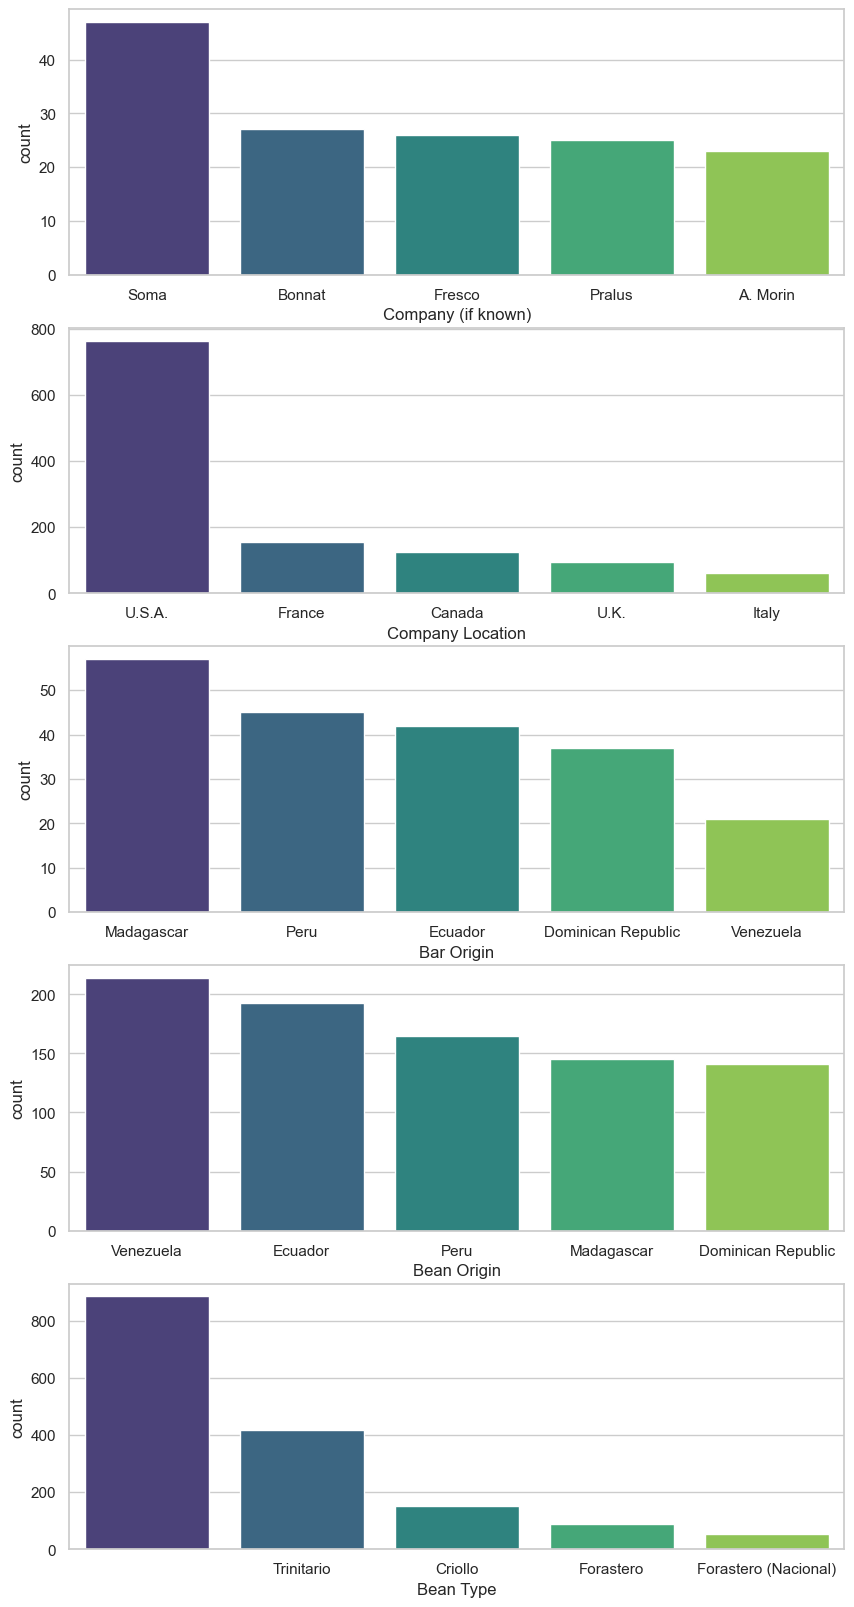

In [98]:
# create subplots to plot the variables all at once
fig, axs = plt.subplots(nrows=5)
fig.set_figheight(20)
fig.set_figwidth(10)

# generate countplot for each varialbe's top 5 values
n = 0
for col in df_categorical.columns:
    sub = sns.countplot(data = df_categorical, x = col, palette = 'viridis',
                  order = df_categorical[col].value_counts().iloc[:5].index, ax=axs[n])
    n = n+1

In [99]:
sub.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'sub'))

Some insights from the plot above:

- as a company, Soma contributed the most chocolate bar to this dataset
- the majority of the companies are from the US
- however, the beans themselves are mainly from Central and South America
- the bars also are mostly produced in South America
- the majority of the beans don't have a bean type recorded, followed by the bean type Trinitario.
There is a shortcut for the single summaries and visualisations done above with the package pandas_profiling, which is a quick way to get the profile of a dataset. However, I do not think it is a bad idea to manually go through the variables one by one if there is sufficient time for doing so, as it allows us to memorise the variables and provides more flexibity during the exploration.

In [103]:
# import the pandas_profiling package
import ydata_profiling as pp

# ignore potential warnings
import warnings
warnings.filterwarnings('ignore')

# generate the profile report of the dataset
Profile = pp.ProfileReport(chocolate_df, title = 'Pandas Profiling Report of the Chocolate Bar Ratings Dataset',
                html = {'style':{'full_width':True}})

In [105]:
file_path = '/Users/priyankamittal/Desktop/Data Analytics/CareerFoundry/Immersion/Advance Analytics/Chocolate Bar Rating/Sent to client/chocolate_report.html'
Profile.to_file(output_file=file_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Carefully examining the columns helps us decide which factors might be crucial in building a reliable model. For example, if we want to take Rating as the target variable, and predict it based on the values of some other attributes, knowing the statistical characteristics and distributions of these variables such as Cocoa Percent, Company (if known) etc. would be helpful. However, this will require more bivariate, or even multivariate analysis on the correlation between variables.

Another advantage of inspecting the dataset is, when we zoom in to observe a single record from the dataset, or have a new record, we shall be able to tell its relation to the whole dataset.

In [65]:
chocolate_df.iloc[99]

Company (if known)         Arete
Bar Origin              San Juan
REF                         1724
Review Date                 2016
Cocoa Percent                0.7
Company Location          U.S.A.
Rating                       3.5
Bean Type             Trinitario
Bean Origin             Trinidad
Name: 99, dtype: object

I extracted the 100th record here.
It is a chocolate bar manufactured by the company Arete. The record is pretty recent according to the REF number and Review Date. The chocolate bar has a cocoa percentage of 0.7 (like most of the bars from the dataset) and a rating of 3.5, which means it just made to the point as the best 25% of the bars reviewed. The company Arete is located in the US. The bean comes from Central America and its type is Trinitario, nothing surprising for us now. The conclusion is, Chocolate Bar #100 is a pretty mediocre one.

### Missing values
Now that we are familiar with the dataset, we can start to address the data quality issue - missing values. Some values are obviously missing.

In [66]:
chocolate_df.isnull().sum()

Company (if known)    0
Bar Origin            0
REF                   0
Review Date           0
Cocoa Percent         0
Company Location      0
Rating                0
Bean Type             1
Bean Origin           1
dtype: int64

In [67]:
# show the observations with NaN
chocolate_df[chocolate_df.isnull().any(axis=1)]

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
1072,Mast Brothers,Madagascar,999,2012,0.72,U.S.A.,2.5,Trinitario,NaN
1544,Soma,"Three Amigos(Chuao, Wild Bolivia, D.R.)",676,2011,0.70,Canada,4.0,NaN,"Ven, Bolivia, D.R."


In [68]:
# replace NaN with 'Other'
chocolate_df = chocolate_df.replace(np.nan, 'Other')
chocolate_df.isnull().sum()

Company (if known)    0
Bar Origin            0
REF                   0
Review Date           0
Cocoa Percent         0
Company Location      0
Rating                0
Bean Type             0
Bean Origin           0
dtype: int64

We noticed earlier that except the obvious missing values, there are also empty fields in some categorical variables such as Bean Type (numeric variables cannot have an empty field as it is a string). To make the dataset consistent and clean, we will replace these empty fields with 'Other' as well.

In [69]:
# replace empty fields with 'Other'
chocolate_df = chocolate_df.replace(r'^\s*$', 'Other', regex=True)
chocolate_df.head(5)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Other,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Other,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Other,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Other,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Other,Peru


Great! Now we have a clean, consistent dataset with no more missing values, and we can start to use it in answering questions.



3. Gain insights and answer questions with the dataset

The author of this dataset left us three questions for inspiration:

- Where are the best cocoa beans grown?
- Which countries produce the highest-rated bars?
- What’s the relationship between cocoa solids percentage and rating?

For the first question, Rating and Bean Origin are supposed to lead us to the answer. My approach is to extract the top 25% of the best rated chocolate bars, and see where they are from

In [70]:
chocolate_df.to_csv(os.path.join(path, 'Data','Prepared Data', 'Chocolate_cleaned.csv'))

In [71]:
# select top rows with the largest values in column 'Rating'?
df_best_chocolate = chocolate_df.nlargest(1795//4,'Rating')
df_best_chocolate.shape

(448, 9)

In [72]:
# where the beans for the best-rated chocolate bars mainly come from
df_best_chocolate['Bean Origin'].value_counts().sort_values(ascending = False).head(10)

Venezuela             76
Ecuador               45
Peru                  40
Madagascar            36
Dominican Republic    35
Brazil                16
Colombia              13
Other                 12
Papua New Guinea      11
Bolivia               11
Name: Bean Origin, dtype: int64

According to the ratings, the best beans are grown in Venezuela, followed by Ecuador and Peru.

For the next question, which countries produce the highest-rated bars, the same approach could be applied, we just need to replace Bean Origin with Bar Origin.

In [73]:
# where best-rated chocolate bars are mainly produced
df_best_chocolate['Bar Origin'].value_counts().sort_values(ascending = False).head(10)

Madagascar            16
Ocumare                8
Dominican Republic     8
Chuao                  7
Ecuador                6
Sambirano              6
Peru                   6
Porcelana              5
Venezuela              5
Carenero Superior      4
Name: Bar Origin, dtype: int64

However, the data points seem to be evenly distributed among all the different bar origins. We mentioned earlier that this variable has very high cardinality. Thus, it might not be that helpful just counting the number of records based on the best ratings. Instead, we can have a closer look at the head of the sorted dataset:

In [74]:
# show the first 10 rows of the subset
df_best_chocolate.head(10)

,Company (if known),Bar Origin,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Bean Origin
78,Amedei,Chuao,111,2007,0.70,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,0.70,Italy,5.0,Blend,Other
9,A. Morin,Pablino,1319,2014,0.70,France,4.0,Other,Peru
17,A. Morin,Chuao,1015,2013,0.70,France,4.0,Trinitario,Venezuela
20,A. Morin,Chanchamayo Province,1019,2013,0.63,France,4.0,Other,Peru
54,Amano,Morobe,725,2011,0.70,U.S.A.,4.0,Other,Papua New Guinea
56,Amano,Guayas,470,2010,0.70,U.S.A.,4.0,Other,Ecuador
76,Amedei,Porcelana,111,2007,0.70,Italy,4.0,Criollo (Porcelana),Venezuela
77,Amedei,Nine,111,2007,0.75,Italy,4.0,Blend,Other
83,Amedei,Madagascar,123,2007,0.70,Italy,4.0,Trinitario (85% Criollo),Madagascar


According to the table above, the top 3 best chocolate bars are produced in Chuao, Toscano Black and Pablino.

As for the last question, the relationship between Cocoa Percent and Rating, there are three assumptions: positive correlation, negative correlation and no correlation. In this case, a picture is worth a thousand words. Since both variables are numeric, to show their relationship, a scatter plot should be an appropriate choice.

Text(0.5, 1.0, 'Cocoa Percent vs. Rating')

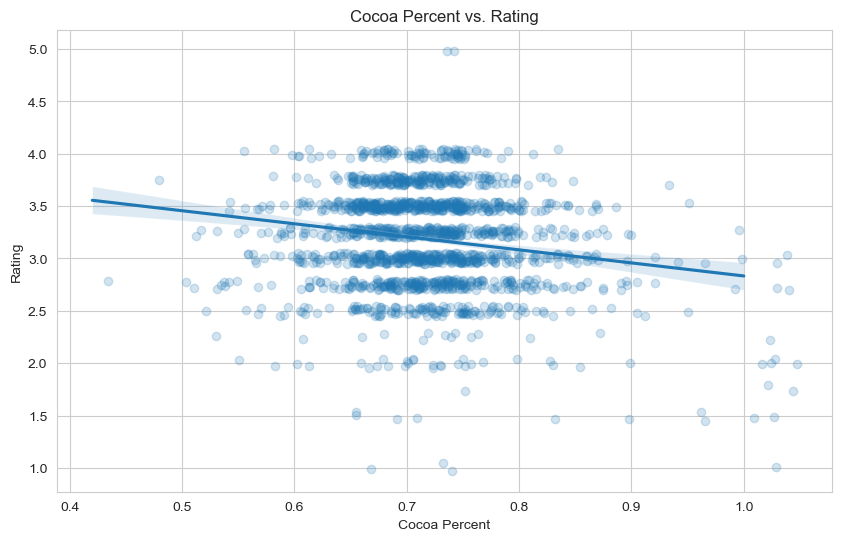

In [75]:
# plot the relationship between cocoa percentage and rating
plt.figure(figsize = (10, 6))
sns.regplot(data = chocolate_df, x = 'Cocoa Percent', y = 'Rating', 
           x_jitter = 0.05, y_jitter = 0.05, scatter_kws = {'alpha' : 1/5})
plt.title('Cocoa Percent vs. Rating')

There's a slight negative correlation between Cocoa Percent and Rating, i.e. chocolate bars with higher cocoa percentage tend to have lower ratings. We can see from the plot that for chocolate bars containing over 90% cocoa, their ratings are mostly below 3.

# Data Exploratory 

### Cocoa percentage in chocolate over the years

In [111]:
chocolate_df.rename(columns = {'Review Date':'Review_Date'}, inplace = True)

In [112]:
dcoco = chocolate_df.groupby('Review_Date').aggregate({'Cocoa Percent':'mean'})
dcoco = dcoco.reset_index()


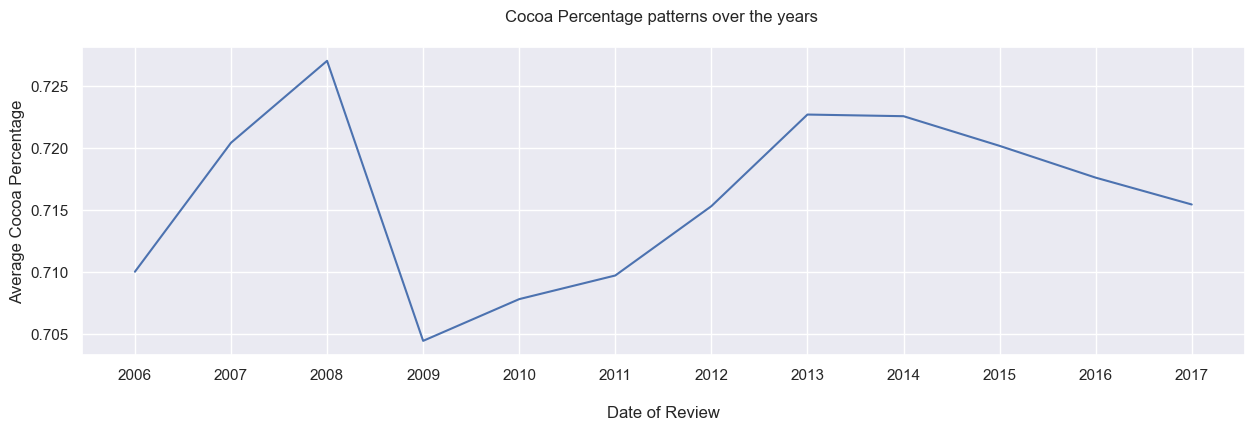

In [113]:
# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Cocoa Percent', data=dcoco)
ax.set(xticks=dcoco.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Cocoa Percentage")
plt.title("Cocoa Percentage patterns over the years \n")
plt.show()

Some Observations from the above graph:

- The highest cocoa percentage in a chocolate bar was in 2008 and was approx 73%.
- The lowest percentage of cocoa followed in the very next year, 2009 and was approx 70%.
- There was a rise in cocoa percentage in chocolate from the year 2009 to 2013
- From 2014 there was a steady decline in cocoa percentage

## Rating of chocolate bars over the years

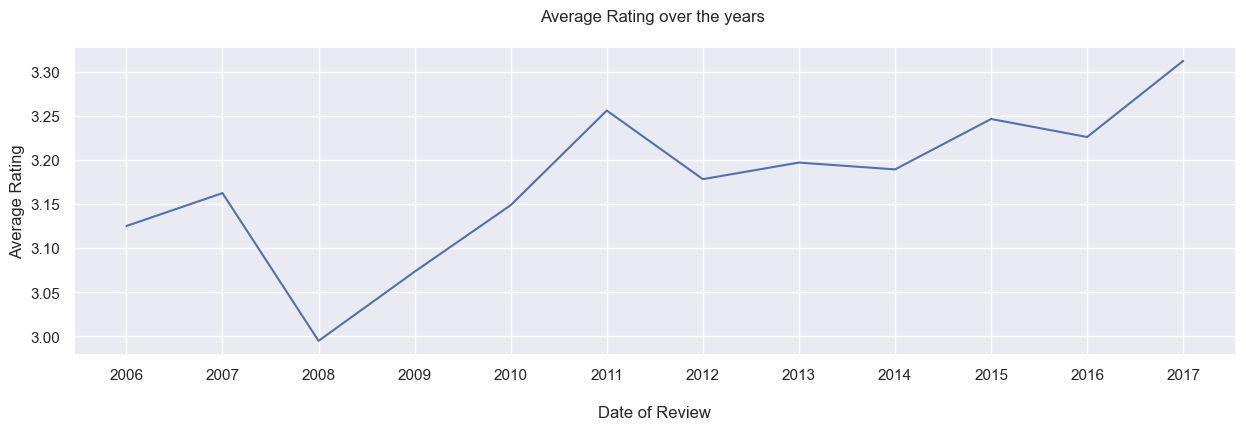

In [114]:
drate = chocolate_df.groupby('Review_Date').aggregate({'Rating':'mean'})
drate = drate.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Rating', data=drate)
ax.set(xticks=drate.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

In [115]:
chocolate_df.columns

Index(['Company (if known)', 'Bar Origin', 'REF', 'Review_Date',
       'Cocoa Percent', 'Company Location', 'Rating', 'Bean Type',
       'Bean Origin'],
      dtype='object')

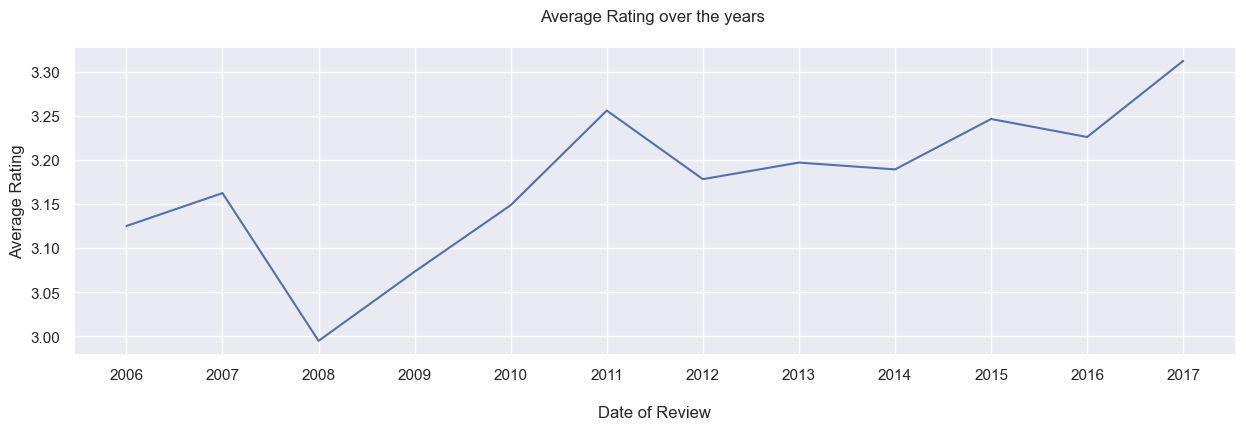

In [116]:
drate = chocolate_df.groupby('Review_Date').aggregate({'Rating':'mean'})
drate = drate.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Rating', data=drate)
ax.set(xticks = drate.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years \n")
plt.show()

### Some observations

- The lowest rating was around 3 and it came in 2008.
- Since then to 2011, there was an increase in average ratings and in 2011 it was at 3.25.
- In 2017 the rating lies at its apex at around 3.31.
- Interestingly, In the year 2008, the cocoa percentage in chocolate was highest and the average rating happened to be the lowest.

The following year in 2009, the chocolate bars saw a steep decline in cocoa percentage, with an increase in average rating. This might indicate that chocolate bar producers decreased their cocoa content to make better chocolates.

### Chocolate companies¶

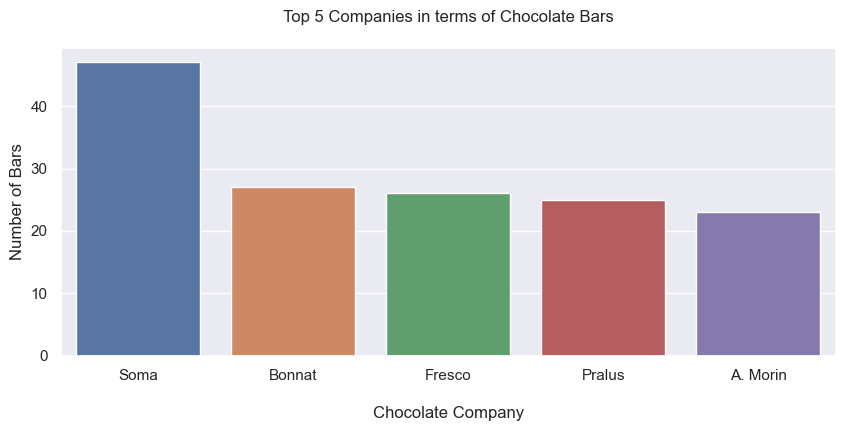

In [117]:
# Top 5 companies in terms of chocolate bars 
d = chocolate_df['Company (if known)'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies

# Plotting
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company (if known)', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()

Soma produces max number of chocolate bars.

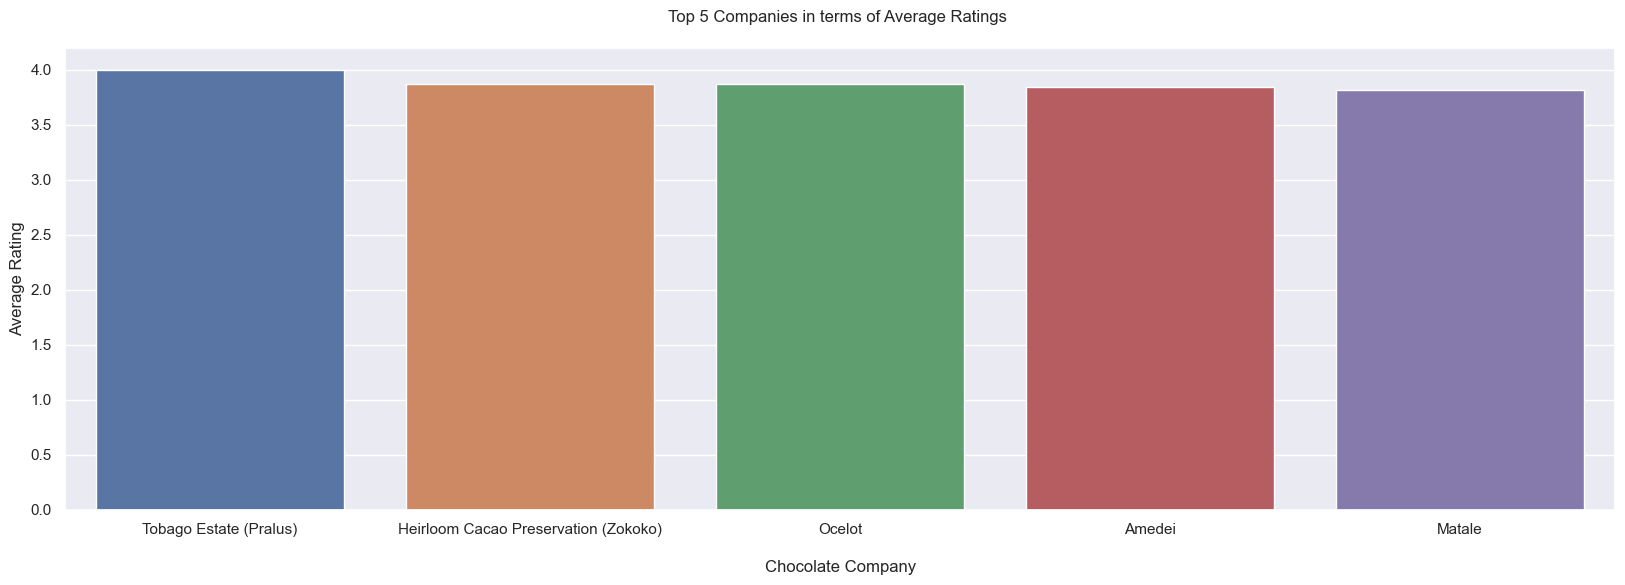

In [118]:
# Top 5 companies in terms of average ratings
d2 = chocolate_df.groupby('Company (if known)').aggregate({'Rating':'mean'})
d2 = d2.sort_values('Rating', ascending=False).head(5)
d2 = d2.reset_index()

# Plotting
sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='Company (if known)', y='Rating', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings \n")
plt.show()

Tobago Estate (Pralus) has the highest rating of 4.0

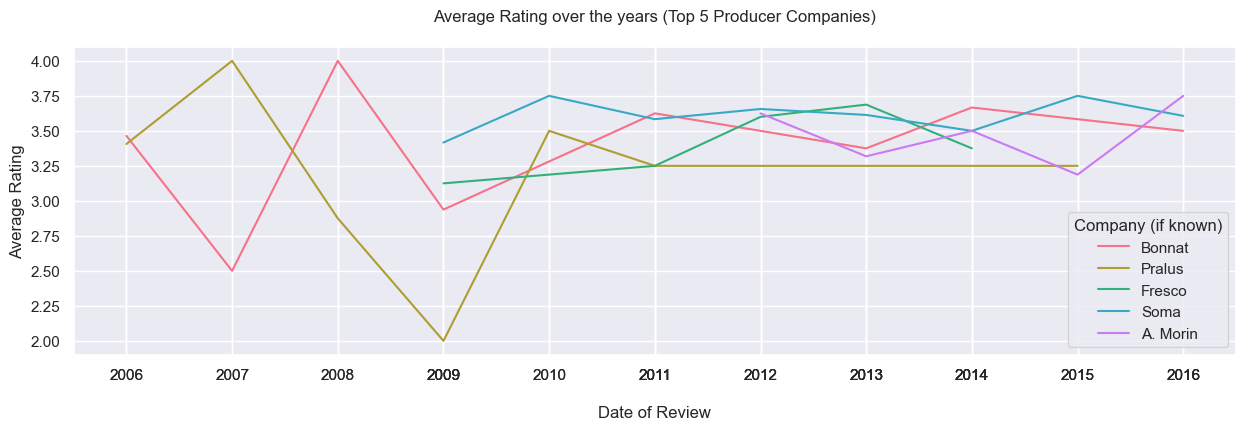

In [119]:
# Average rating over the years wrt companies
top5_dict = {}
# Top 5 companies in terms of chocolate bars in this dataset
d = chocolate_df['Company (if known)'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 companies
for element in list(d['index']):
    temp = chocolate_df[chocolate_df['Company (if known)']==element]
    top5_dict[element]=temp

top5_list = list(top5_dict.keys())

# Rating over the years
d7 = chocolate_df.groupby(['Review_Date', 'Company (if known)']).aggregate({'Rating':'mean'})
d7 = d7.reset_index()
d7 = d7[d7['Company (if known)'].isin(top5_list)]


# Plotting
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review_Date', y='Rating', hue="Company (if known)", data=d7, palette="husl")
ax.set(xticks=d7.Review_Date.values)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years (Top 5 Producer Companies)\n")
plt.show()

Pralus and Bonnat were the earliest companies among these top 5 to be reviewed in 2006, while A. Morin was the latest at 2012

Both Bonnat and Pralus started around with the same average rating in 2006 of around 3.40, but in the very next year of 2007, whle Pralus hit it's highest ever rating of 4.00, Bonnat slumped to it's lowest of 2.50. 

As of 2016, Bonnat stands 0.25 rating points clear of Pralus on the yearly average

The worst rating among these top 5 came in 2009 when Pralus scored only a 2.00 on average. This was a result of Pralus's steady decline from 4.00 in 2007 to 2.00 in 2009.
Coincidentally, the highest rating was just a year back, 2008 when Bonnat hit 4.00 (a feat Pralus had achieved in 2007)

From 2011 to 2015, Pralus has shown consistency in the average ratings

A. Morin was reviewed only for the years 2012, 2013, 2014, 2015 and 2016. As of 2016, it's got the highest average rating at 3.75

Fresco has not been reviewed after 2014, and its last review gave it around 3.30 on average rating

Soma was first reviewed in 2009 where it got around 3.42. In it's latest review in 2016, it has a 3.61

Soma's lowest rating came in 2009 (3.42) and this is still higher than the lowest ratings other companies have got over all years

### Analysing the largest chocolate bar producer - Soma

Location where Soma gets their beans from

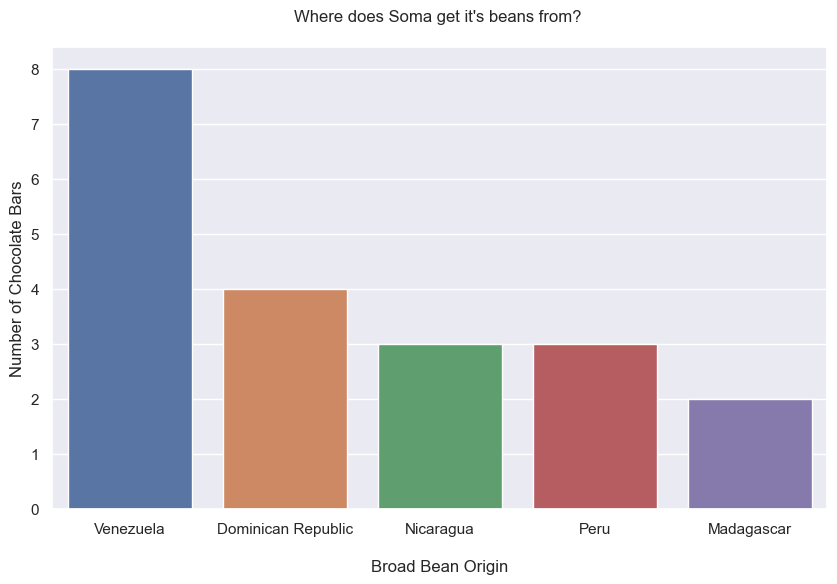

In [120]:
soma = chocolate_df[chocolate_df['Company (if known)']=='Soma']
d3 = soma['Bean Origin'].value_counts().sort_values(ascending=False).head(5)
d3 = pd.DataFrame(d3)
d3 = d3.reset_index()
# Plotting
sns.set()
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Bean Origin', data=d3)
plt.xlabel("\nBroad Bean Origin")
plt.ylabel("Number of Chocolate Bars")
plt.title("Where does Soma get it's beans from? \n")
plt.show()

Venezuela is the largest provider of Soma's beans.

### Visualizing Soma's chocolate bar rating

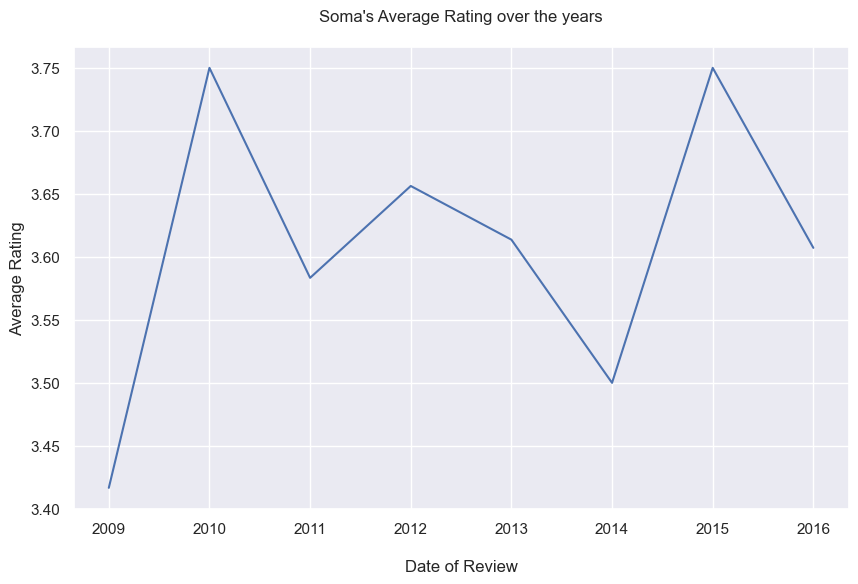

In [121]:
#Soma's performance over the years
d4 = soma.groupby('Review_Date').aggregate({'Rating':'mean'})
d4 = d4.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Review_Date', y='Rating', data=d4)
plt.xlabel("\nDate of Review")
plt.ylabel("Average Rating")
plt.title("Soma's Average Rating over the years\n")
plt.show()

The worst average rating Soma ever got came in the year 2009 at 3.42, when it was first reviewed
The highest average rating achieved came in 2010 at 3.75
Between 2012 and 2014, Soma's average rating saw a slump which revived after 3.75 was achieved in 2015 again; it slumped to 3.61 in 2016

### Categorizing chocolate bars based on their rating¶



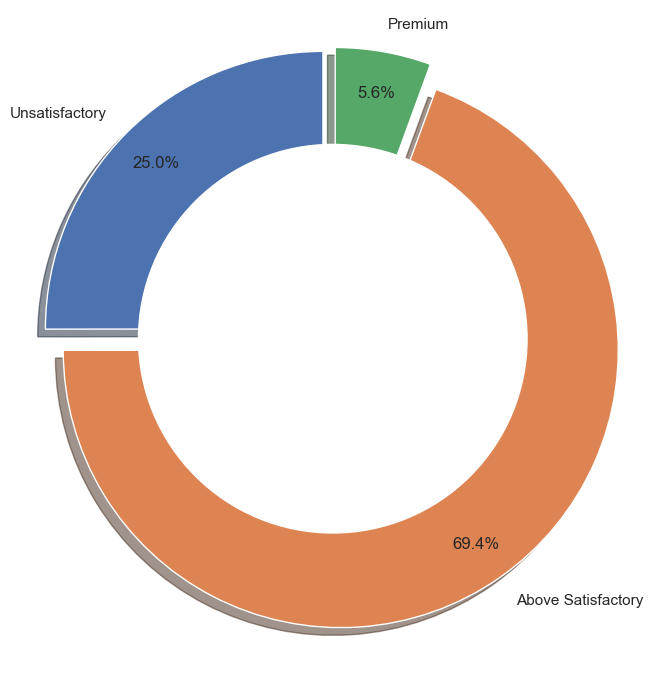

In [122]:
unsatisfactory = chocolate_df[chocolate_df['Rating'] < 3.0]
satisfactory = chocolate_df[(chocolate_df['Rating'] >= 3.0) & (chocolate_df.Rating < 4)]
pre_elite = chocolate_df[chocolate_df['Rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory','Premium']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],pre_elite.shape[0]]

# Making the donut plot
explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()

premium chocolate bars are produced very rarely (Only 5.6% of total chocolate bars produced)

### Counts of each rating of chocolate bars

Rating: 3.5 Reviews: 392
Rating: 3.0 Reviews: 341
Rating: 3.25 Reviews: 303
Rating: 2.75 Reviews: 259
Rating: 3.75 Reviews: 210
Rating: 2.5 Reviews: 127
Rating: 4.0 Reviews: 98
Rating: 2.0 Reviews: 32
Rating: 2.25 Reviews: 14
Rating: 1.5 Reviews: 10
Rating: 1.0 Reviews: 4
Rating: 1.75 Reviews: 3
Rating: 5.0 Reviews: 2


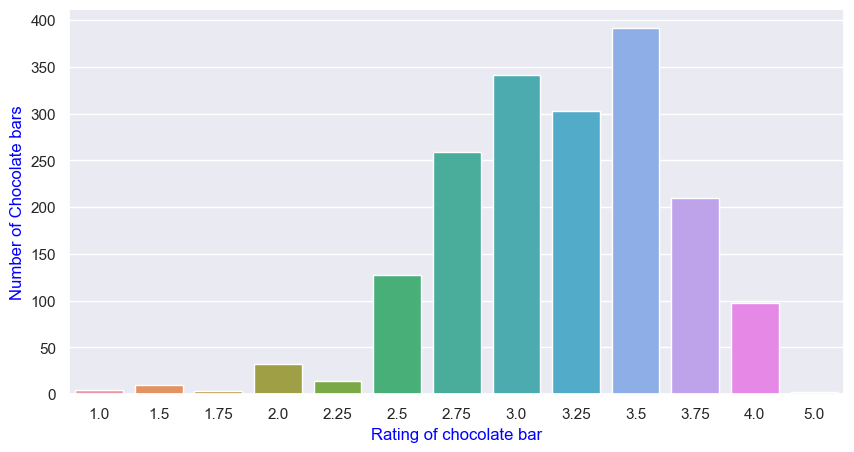

In [123]:
# The counts of each rating
r=list(chocolate_df['Rating'].value_counts())
rating=chocolate_df['Rating'].value_counts().index.tolist()
rat=dict(zip(rating,r))
for key,val in rat.items():
    print ('Rating:',key,'Reviews:',val)
plt.figure(figsize=(10,5))
sns.countplot(x='Rating',data=chocolate_df)
plt.xlabel('Rating of chocolate bar',size=12,color='blue')
plt.ylabel('Number of Chocolate bars',size=12,color='blue')
plt.show()

Most bars have been rated at 3.5.`M

### Distribution of chocolate bars according to their cocoa percentage
`

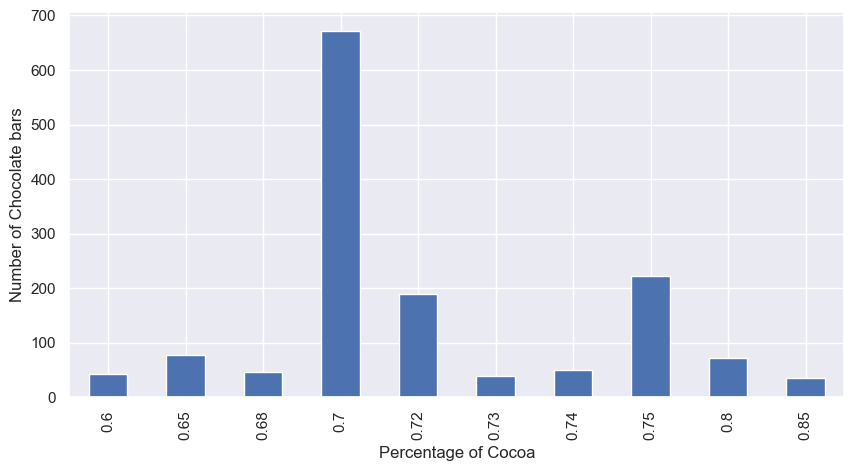

In [124]:
#Top 10 cocoa % is taken
plt.figure(figsize=(10,5))
chocolate_df['Cocoa Percent'].value_counts().head(10).sort_index().plot.bar()
plt.xlabel('Percentage of Cocoa',size=12)
plt.ylabel('Number of Chocolate bars',size=12)
plt.show()

Majority of bars have 70% cocoa, followed by 75% and 72%.

### Where the best cocoa beans are grown (based on rating)

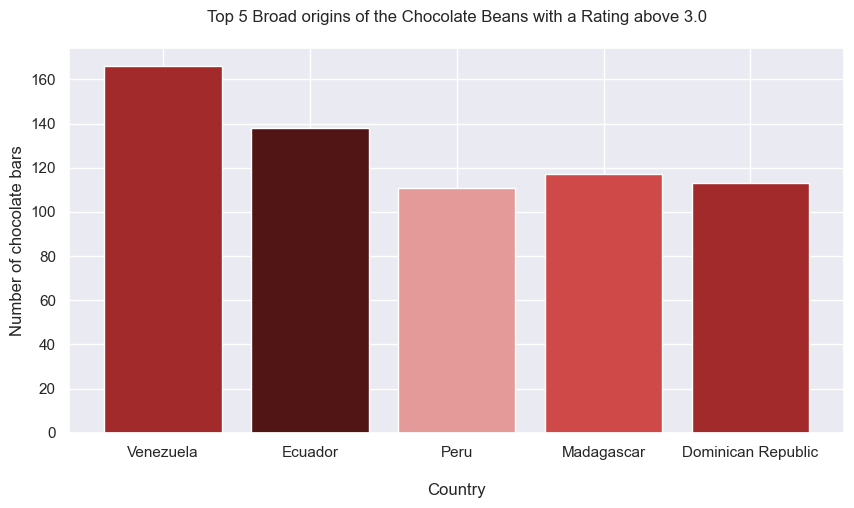

{'Venezuela': 166, 'Ecuador': 138, 'Peru': 111, 'Madagascar': 117, 'Dominican Republic': 113}


In [125]:
countries=chocolate_df['Bean Origin'].value_counts().index.tolist()[:5]
satisfactory={} 
for j in countries:
    c=0
    b=chocolate_df[chocolate_df['Bean Origin']==j]
    br=b[b['Rating']>=3] 
    for i in br['Rating']:
        c+=1
        satisfactory[j]=c    

# Code to visualize the countries that give best cocoa beans
li=satisfactory.keys()
plt.figure(figsize=(10,5))
plt.bar(range(len(satisfactory)), satisfactory.values(), align='center',color=['#a22a2a','#511515','#e59a9a','#d04949','#a22a2a'])
plt.xticks(range(len(satisfactory)), list(li))
plt.xlabel('\nCountry')
plt.ylabel('Number of chocolate bars')
plt.title("Top 5 Broad origins of the Chocolate Beans with a Rating above 3.0\n")
plt.show()

print(satisfactory)

Venezuela has the largest number of chocolate bars rated above 3.0

### Analysing the top chocolate bar producing countries (in terms of quantity)¶

Top Chocolate Producing Countries in the World

U.S.A.    764
France    156
Canada    125
U.K.       96
Italy      63
Name: Company Location, dtype: int64


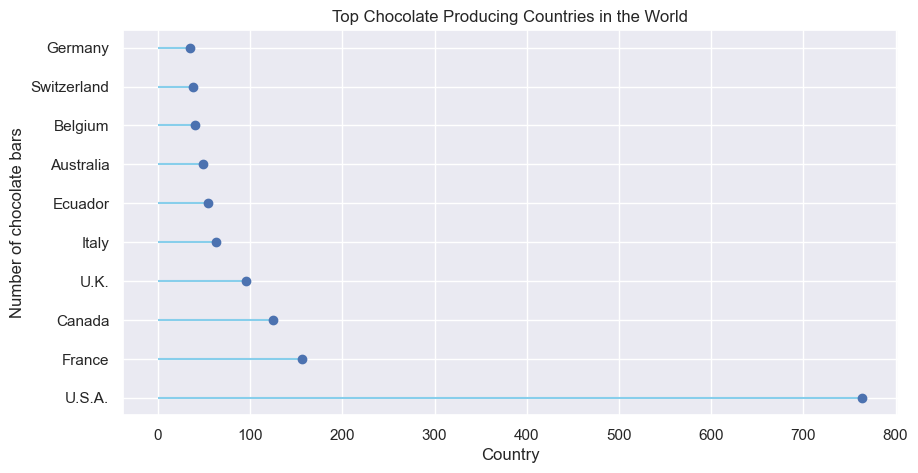

In [126]:
print ('Top Chocolate Producing Countries in the World\n')
country=list(chocolate_df['Company Location'].value_counts().head(10).index)
choco_bars=list(chocolate_df['Company Location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(chocolate_df['Company Location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='skyblue')
plt.plot(choco_bars,country,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World")
plt.show()

USA is the top chocolate producing country

## Visualizing countries that produce best chocolates

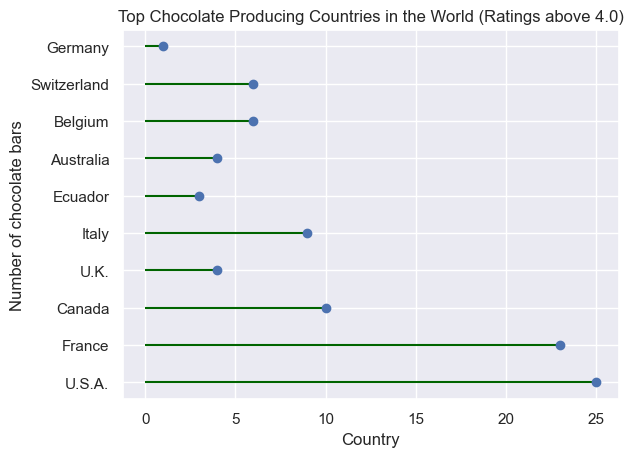

{'U.S.A.': 25, 'France': 23, 'Canada': 10, 'U.K.': 4, 'Italy': 9, 'Ecuador': 3, 'Australia': 4, 'Belgium': 6, 'Switzerland': 6, 'Germany': 1}


In [127]:
countries=country
best_choc={}
for j in countries:
    c=0
    b=chocolate_df[chocolate_df['Company Location']==j]
    br=b[b['Rating']>=4] 
    for i in br['Rating']:
        c+=1
        best_choc[j]=c    


li=best_choc.keys()
# The lollipop plot
plt.hlines(y=li,xmin=0,xmax=best_choc.values(),color='darkgreen')
plt.plot(best_choc.values(),li,"o")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top Chocolate Producing Countries in the World (Ratings above 4.0)")
plt.show()
print(best_choc)

USA produces the highest number of 4 and above rated chocolate bars, followed by France